# Flipkart Laptop Pricing Web Scraper
A Python-based web scraping project that collects, cleans, and analyzes laptop pricing data under ₹60,000 from Flipkart to identify trends in pricing, ratings, and brand dominance.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URLs
BASE_URL = "https://www.flipkart.com"
SEARCH_URL = "https://www.flipkart.com/search?q=laptop+under+60000&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_2_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_2_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop+under+60000&requestId=c0611bba-e47c-421d-9161-c14de9f32d9c&p%5B%5D=facets.price_range.from%3DMin&p%5B%5D=facets.price_range.to%3D60000"

# Headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36"
}

# Data dictionary
all_data = {
    "Brand": [],
    "Product_Name": [],
    "Price": [],
    "Rating": [],
    "Review_Count": [],
    "Discount": [],
    "Description": [],
    "Product_URL": [],
    "Image_URL": []
}

In [2]:
MAX_PAGES = 10
total = 0

print("--- Starting Multi-Page Scraping ---")

for page in range(1, MAX_PAGES + 1):
    print(f"\nScraping Page {page}...")
    url = SEARCH_URL + f"&page={page}"

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all products
    products = soup.find_all("div", class_="jIjQ8S")
    if not products:
        print("No more products found, stopping.")
        break

    for p in products:
        # Product Name and Brand
        name_tag = p.find("div", class_="RG5Slk")
        name = name_tag.text.strip() if name_tag else "NA"
        brand = name.split()[0] if name != "NA" else "NA"

        # Price
        price_tag = p.find("div", class_="hZ3P6w")
        price = price_tag.text.replace("₹", "").replace(",", "") if price_tag else "NA"

        # Rating
        rating_tag = p.find("div", class_="MKiFS6")
        rating = rating_tag.text.strip() if rating_tag else "NA"

        # Review count
        review_tag = p.find("span", class_="PvbNMB")
        if review_tag:
            match = re.search(r"([\d,]+)", review_tag.text)
            review = match.group(1).replace(",", "") if match else "0"
        else:
            review = "0"

        # Discount
        discount_tag = p.find("div", class_="HQe8jr")
        discount = discount_tag.text.strip() if discount_tag else "NA"

        # Description / Features
        features = p.find("ul", class_="HwRTzP")
        description = " | ".join(li.text for li in features.find_all("li")) if features else "NA"

        # Product URL
        link = p.find("a", class_="k7wcnx")
        product_url = BASE_URL + link["href"] if link else "NA"

        # Image URL
        img = p.find("img", class_="UCc1lI")
        image_url = img["src"] if img else "NA"

        # Append data
        all_data["Brand"].append(brand)
        all_data["Product_Name"].append(name)
        all_data["Price"].append(price)
        all_data["Rating"].append(rating)
        all_data["Review_Count"].append(review)
        all_data["Discount"].append(discount)
        all_data["Description"].append(description)
        all_data["Product_URL"].append(product_url)
        all_data["Image_URL"].append(image_url)

    total = total + len(products)
    print(f"-> {len(products)} products found. Total scraped: {total}")
    
print("\n--- Scraping Finished ---")
print("Total Products:", total)  

--- Starting Multi-Page Scraping ---

Scraping Page 1...
-> 24 products found. Total scraped: 24

Scraping Page 2...
-> 24 products found. Total scraped: 48

Scraping Page 3...
-> 24 products found. Total scraped: 72

Scraping Page 4...
-> 24 products found. Total scraped: 96

Scraping Page 5...
-> 24 products found. Total scraped: 120

Scraping Page 6...
-> 24 products found. Total scraped: 144

Scraping Page 7...
-> 24 products found. Total scraped: 168

Scraping Page 8...
-> 24 products found. Total scraped: 192

Scraping Page 9...
-> 24 products found. Total scraped: 216

Scraping Page 10...
-> 24 products found. Total scraped: 240

--- Scraping Finished ---
Total Products: 240


In [3]:
df = pd.DataFrame(all_data)

In [4]:
df.head(5)

,Brand,Product_Name,Price,Rating,Review_Count,Discount,Description,Product_URL,Image_URL
0,Lenovo,Lenovo IdeaPad Slim 3 Next Gen AI PC WUXGA IPS...,49990,4.2,447,46% off,Qualcomm Snapdragon X Processor | 16 GB LPDDR5...,https://www.flipkart.com/lenovo-ideapad-slim-3...,https://rukminim2.flixcart.com/image/312/312/x...
1,Samsung,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,56990,4.4,15181,31% off,Intel Core i5 Processor (13th Gen) | 16 GB LPD...,https://www.flipkart.com/samsung-galaxy-book4-...,https://rukminim2.flixcart.com/image/312/312/x...
2,Samsung,Samsung Galaxy Book4 Edge Series Copilot AI-PC...,57499,4.4,1945,37% off,Qualcomm Snapdragon X Processor | 16 GB LPDDR5...,https://www.flipkart.com/samsung-galaxy-book4-...,https://rukminim2.flixcart.com/image/312/312/x...
3,Acer,Acer NITRO LITE 16 Intel Core i5 13th Gen 1342...,59990,4.5,128,29% off,Intel Core i5 Processor (13th Gen) | 16 GB DDR...,https://www.flipkart.com/acer-nitro-lite-16-in...,https://rukminim2.flixcart.com/image/312/312/x...
4,ASUS,ASUS Expertbook P1 High-performance processor ...,50990,4.3,3887,43% off,Intel Core i5 Processor (13th Gen) | 16 GB DDR...,https://www.flipkart.com/asus-expertbook-p1-hi...,https://rukminim2.flixcart.com/image/312/312/x...


In [5]:
df.shape

(240, 9)

In [6]:
df.isnull().sum()

Brand           0
Product_Name    0
Price           0
Rating          0
Review_Count    0
Discount        0
Description     0
Product_URL     0
Image_URL       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         240 non-null    object
 1   Product_Name  240 non-null    object
 2   Price         240 non-null    object
 3   Rating        240 non-null    object
 4   Review_Count  240 non-null    object
 5   Discount      240 non-null    object
 6   Description   240 non-null    object
 7   Product_URL   240 non-null    object
 8   Image_URL     240 non-null    object
dtypes: object(9)
memory usage: 17.0+ KB


In [8]:
# Data Cleaning & Type Conversion

df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Price"] = df["Price"].fillna(df["Price"].mean())
df["Price"] = df["Price"].astype(int)

df["Review_Count"] = (df["Review_Count"].astype(str).str.replace(",", "", regex=False))
df["Review_Count"] = pd.to_numeric(df["Review_Count"], errors="coerce")
df["Review_Count"] = df["Review_Count"].fillna(df["Review_Count"].mean()).astype(int)

df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
rating_mean = round(df["Rating"].mean(), 1)
df["Rating"] = df["Rating"].fillna(rating_mean).astype(float)

df["Discount"] = df["Discount"].fillna("0% off").astype(str)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         240 non-null    object 
 1   Product_Name  240 non-null    object 
 2   Price         240 non-null    int64  
 3   Rating        240 non-null    float64
 4   Review_Count  240 non-null    int64  
 5   Discount      240 non-null    object 
 6   Description   240 non-null    object 
 7   Product_URL   240 non-null    object 
 8   Image_URL     240 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 17.0+ KB


In [10]:
df.to_csv("flipkart_laptops.csv", index=False)

print("Data saved to flipkart_laptops.csv")

Data saved to flipkart_laptops.csv


In [11]:
df.describe()

,Price,Rating,Review_Count
count,240.000000,240.000000,240.000000
mean,51492.645833,4.167500,2250.533333
std,7839.149971,0.324756,4087.315420
min,31380.000000,2.300000,0.000000
25%,46990.000000,4.200000,55.750000
50%,53990.000000,4.200000,457.000000
75%,57492.250000,4.300000,1856.500000
max,59990.000000,4.800000,15181.000000


#### I scraped real-world e-commerce data, handled missing and invalid values, converted data types properly, and prepared a clean dataset for analysis.

# Data Visualization

# Distribution of Laptop Prices

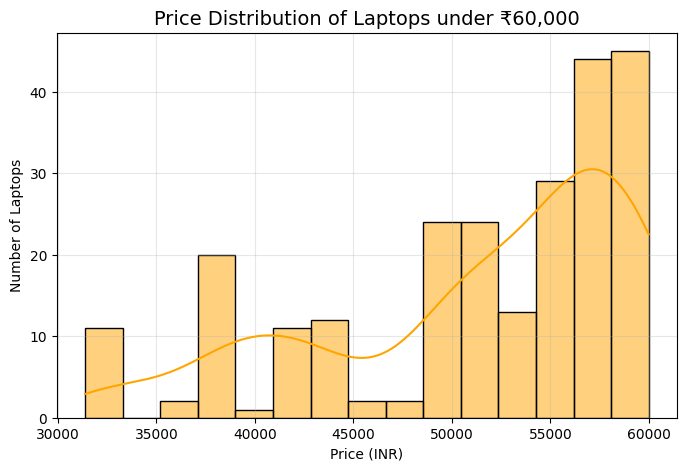

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=15, color="orange", kde=True)
plt.title("Price Distribution of Laptops under ₹60,000", fontsize=14)
plt.xlabel("Price (INR)")
plt.ylabel("Number of Laptops")
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation:
Most laptops are priced between ₹45,000 and ₹60,000, indicating that the mid-range segment dominates the market for laptops under ₹60,000.

# 

# Rating Distribution

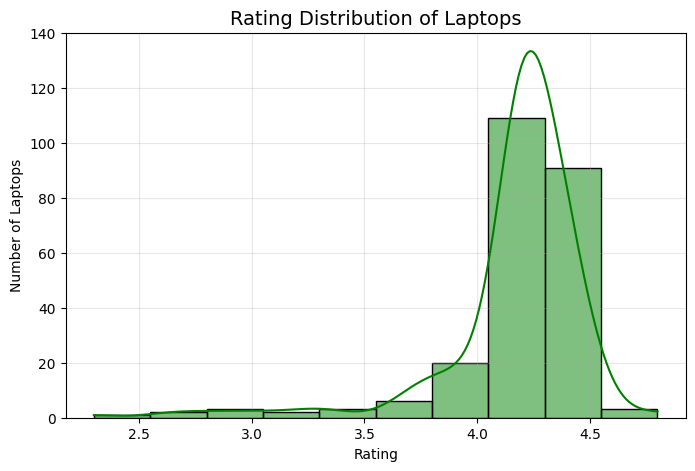

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=10, color="green", kde=True)
plt.title("Rating Distribution of Laptops", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Number of Laptops")
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation:
The majority of laptops have ratings between 3.8 and 4.4, reflecting generally good customer satisfaction even for budget-friendly options.

# 

# Top Brands

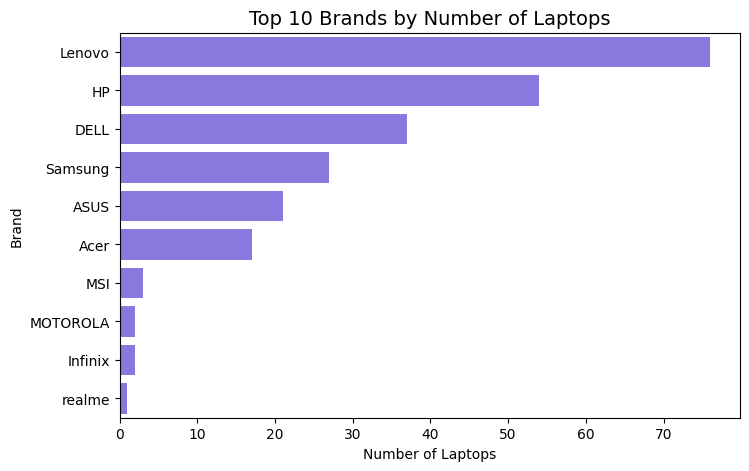

In [14]:
top_brands = df["Brand"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.values, y=top_brands.index, color="mediumslateblue")  # Single color avoids palette warning
plt.title("Top 10 Brands by Number of Laptops", fontsize=14)
plt.xlabel("Number of Laptops")
plt.ylabel("Brand")
plt.show()

# Interpretation:
A few popular brands account for most laptop listings, highlighting higher consumer trust in well-established brands.

# 

# Price vs Rating

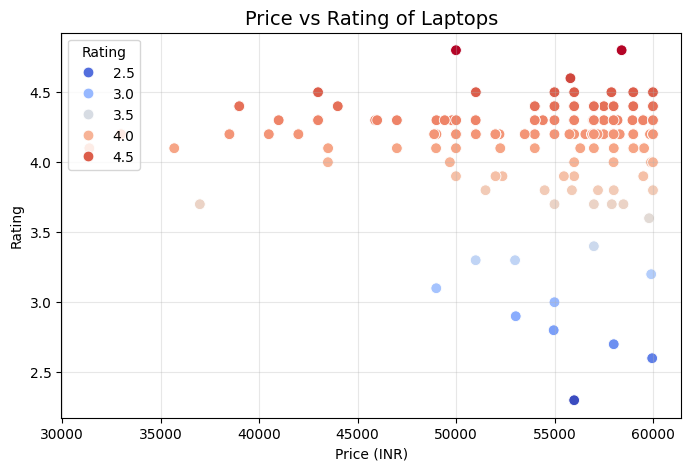

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Price", y="Rating", data=df, hue="Rating", palette="coolwarm", s=60)
plt.title("Price vs Rating of Laptops", fontsize=14)
plt.xlabel("Price (INR)")
plt.ylabel("Rating")
plt.legend(title="Rating", loc="upper left")
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation:
There is no strong correlation between price and rating, suggesting that a higher price does not necessarily guarantee better quality.

# 

# Review Count Distribution

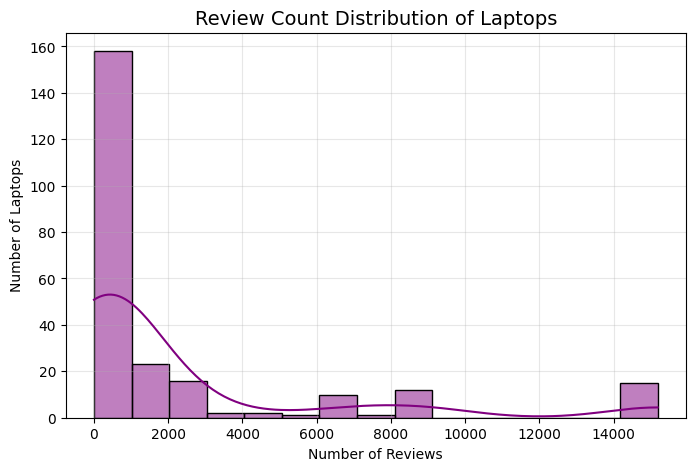

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Review_Count"], bins=15, color="purple", kde=True)
plt.title("Review Count Distribution of Laptops", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Laptops")
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation:
Most laptops receive a moderate number of reviews, while a few products attract very high engagement, indicating particularly popular models.